In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
file_path = r'C:\Users\serik\OneDrive\Рабочий стол\machine learning\cardio\cardio_train.csv'
df = pd.read_csv(file_path, delimiter=";")
display(df)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [12]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

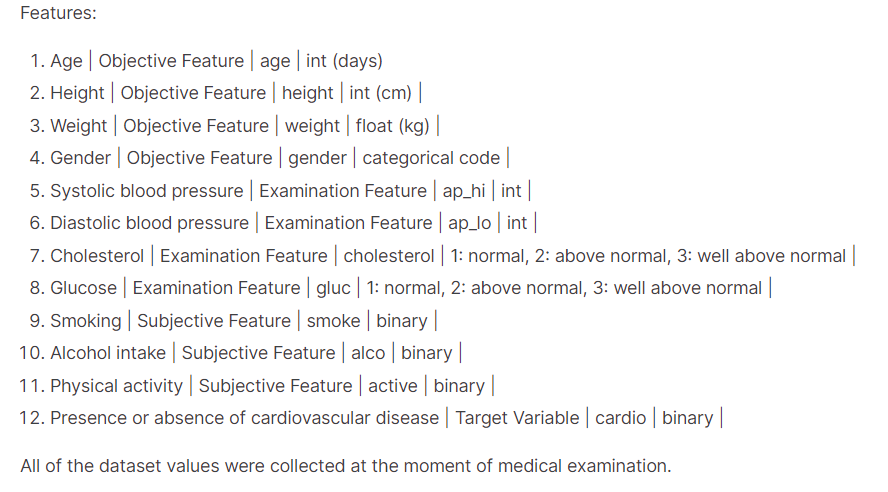

In [11]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [17]:
print(df['cardio'].value_counts())
print(df['ap_hi'].value_counts())
print(df['ap_lo'].value_counts())

0    35021
1    34979
Name: cardio, dtype: int64
 120     27699
 140      9506
 130      8961
 110      8644
 150      4450
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: ap_hi, Length: 153, dtype: int64
80     34847
90     14316
70     10245
100     4082
60      2727
       ...  
56         1
182        1
810        1
9          1
602        1
Name: ap_lo, Length: 157, dtype: int64


In [46]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [58]:
scaler = RobustScaler()

In [59]:
df['age'] = scaler.fit_transform(df[['age']])
df['height'] = scaler.fit_transform(df[['height']])
df['weight'] = scaler.fit_transform(df[['weight']])
df['ap_hi'] = scaler.fit_transform(df[['ap_hi']])
df['ap_lo'] = scaler.fit_transform(df[['ap_lo']])

In [60]:
display(df)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,-0.357630,2,0.272727,-0.588235,-0.50,0.0,1,1,0,0,1,0
1,1,0.143325,1,-0.818182,0.764706,1.00,1.0,3,1,0,0,1,1
2,2,-0.230958,1,0.000000,-0.470588,0.50,-1.0,3,1,0,0,0,1
3,3,-0.567841,2,0.363636,0.588235,1.50,2.0,1,1,0,0,1,1
4,4,-0.608518,1,-0.818182,-0.941176,-1.00,-2.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,-0.126399,2,0.272727,0.235294,0.00,0.0,1,1,1,0,1,0
69996,99995,0.791155,1,-0.636364,3.176471,1.00,1.0,2,2,0,0,1,1
69997,99996,-0.173901,2,1.636364,1.941176,3.00,1.0,3,1,0,1,0,1
69998,99998,0.744745,1,-0.181818,0.000000,0.75,0.0,1,2,0,0,0,1


In [61]:
X = df.drop(["cardio","id"], axis=1)
y = df["cardio"]

In [63]:
ohe_label = OneHotEncoder()
y = df["cardio"]
y_encoded = ohe_label.fit_transform(y.values.reshape(-1, 1))
ohe_new_columns = list(ohe_label.get_feature_names_out(["cardio"]))
y_encoded_df = pd.DataFrame(y_encoded.toarray(), columns=ohe_new_columns, index=df.index)

In [20]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded_df, test_size=0.20, shuffle=True, random_state=1, stratify=y_encoded_df)

In [65]:
y_train.shape

(56000, 2)

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler

In [40]:
def create_model(input_shape, dropout_rate=0.2, weight_decay=0.0001):
    model = Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(2, activation='sigmoid'))
    return model

In [41]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.1

In [66]:
input_shape = X_train.shape[1]
model = create_model(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(label_smoothing=0.1), metrics=['accuracy'])

callbacks = [LearningRateScheduler(scheduler, verbose=1)]
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
1750/1750 [==============================] - 3s 1ms/step - loss: 0.6298 - accuracy: 0.7177 - val_loss: 0.5935 - val_accuracy: 0.7301 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
1750/1750 [==============================] - 2s 1ms/step - loss: 0.6026 - accuracy: 0.7286 - val_loss: 0.5872 - val_accuracy: 0.7304 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5945 - accuracy: 0.7312 - val_loss: 0.5846 - val_accuracy: 0.7336 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
1750/1750 [==============================] - 2s 1ms/step - loss: 0.5928 - accuracy: 0.7287 - val_loss: 0.5824 - val_accuracy: 0.7304 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rat

In [70]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)
print("Validation Loss: ", val_loss)
print("Validation Accuracy: ", val_acc)

438/438 - 0s - loss: 0.5769 - accuracy: 0.7380 - 270ms/epoch - 617us/step
Validation Loss:  0.5769036412239075
Validation Accuracy:  0.7379999756813049


**XGboost classifier** 

In [71]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [72]:
model = xgb.XGBClassifier(random_state=1)

In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.001, 0.01, 0.1],
}

In [76]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [77]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy of the best model: {accuracy:.2f}")

Validation accuracy of the best model: 0.74
